# Individual Algo Weak Scaling (Thread numbers on same plot)

In [1]:
!pip install llnl-thicket

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.2 MB/s eta 0:00:00


In [2]:
import sys
# sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
# sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

## modify this to whatever directory you saved this file and the data in
%cd /content/drive/My Drive/thicket-practice/

Mounted at /content/drive
/content/drive/My Drive/thicket-practice


Read in all the files

In [4]:
tk = th.Thicket.from_caliperreader(glob("merge_mpi_cali/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)

In [5]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              6222213         16.583746   
                                                  8654018          5.934962   
                                                  65364533         0.788291   
                                                  83147926        13.077885   
                                                  108340675        6.927706   
                                                  113649686       19.089650   
                                                  124517305        0.771172   
                                                  142231215        0.508345   
                                                  147753700        0.548983   
                                                  150738664        0.532398   
                                                  156047618        8.357334   
                                                  195167352        0.573237   
                                                  223604819        0.886345   
                                                  250811712        0.404289   
                                                  256601229        9.248942   
                                                  280790330       27.601063   
                                                  323337785       25.932993   
                                                  327768957       26.306306   
                                                  343605715        1.107286   
                                                  356130471        1.794932   
                                                  376878331        3.408614   
                                                  391560635        1.471097   
                                                  402246789       14.125322   
                                                  429575901        3.190064   
                                                  440311480        0.990349   
                                                  442415665        1.494236   
                                                  442775966        0.755487   
                                                  446891881        0.814511   
                                                  466359386        8.035825   
                                                  483442337        8.651232   
                                                  492146754        4.509099   
                                                  497271456        9.755237   
                                                  497651054       28.022578   
                                                  514764303       36.090118   
                                                  585839645       26.324211   
                                                  606493607        2.503674   
                                                  640602562        1.798493   
                                                  668803083        9.698750   
                                                  671331609        1.406953   
                                                  672587892       25.968184   
                                                  678281950        3.345770   
                                                  679404600        2.495097   
                                                  683898562        0.598936   
                                                  687300418        3.474556   
                                                  693048497        0.526261   
                                                  706685210        0.394045   
                                                  717770186        2.409186   
                                                  745352312       26.123176   
                                                  746663286       27.599465   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [6]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.1

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     ├─ 1.000 MPI_Recv
│     ├─ 1.000 MPI_Scatter
│     └─ 1.000 MPI_Send
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init



In [7]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
6222213              2.11.0-dev               4   
8654018              2.11.0-dev              64   
65364533             2.11.0-dev              16   
83147926             2.11.0-dev             128   
108340675            2.11.0-dev               2   
113649686            2.11.0-dev             512   
124517305            2.11.0-dev              16   
142231215            2.11.0-dev               2   
147753700            2.11.0-dev               4   
150738664            2.11.0-dev               8   
156047618            2.11.0-dev             128   
195167352            2.11.0-dev               8   
223604819            2.11.0-dev               8   
250811712            2.11.0-dev               4   
256601229            2.11.0-dev             512   
280790330            2.11.0-dev               2   
323337785            2.11.0-dev            1024   
327768957            2.11.0-dev            1024   
343605715            2.11.0-dev               4   
356130471            2.11.0-dev               4   
376878331            2.11.0-dev             256   
391560635            2.11.0-dev              32   
402246789            2.11.0-dev               4   
429575901            2.11.0-dev             256   
440311480            2.11.0-dev              16   
442415665            2.11.0-dev               4   
442775966            2.11.0-dev              16   
446891881            2.11.0-dev              16   
466359386            2.11.0-dev             512   
483442337            2.11.0-dev             512   
492146754            2.11.0-dev               8   
497271456            2.11.0-dev             512   
497651054            2.11.0-dev            1024   
514764303            2.11.0-dev            1024   
585839645            2.11.0-dev               4   
606493607            2.11.0-dev              64   
640602562            2.11.0-dev              16   
668803083            2.11.0-dev             512   
671331609            2.11.0-dev              32   
672587892            2.11.0-dev            1024   
678281950            2.11.0-dev             256   
679404600            2.11.0-dev             128   
683898562            2.11.0-dev               2   
687300418            2.11.0-dev             256   
693048497            2.11.0-dev               8   
706685210            2.11.0-dev               4   
717770186            2.11.0-dev               8   
745352312            2.11.0-dev            1024   
746663286            2.11.0-dev               2   
752637709            2.11.0-dev              64   
775259206            2.11.0-dev               4   
787759768            2.11.0-dev            1024   
792957775            2.11.0-dev               2   
798833536            2.11.0-dev             256   
847023067            2.11.0-dev             128   
873438930            2.11.0-dev             128   
904480258            2.11.0-dev              16   
919199520            2.11.0-dev             256   
922653823            2.11.0-dev            1024   
928804105            2.11.0-dev              64   
938271588            2.11.0-dev              64   
982372139            2.11.0-dev               2   
985392218            2.11.0-dev              16   
1008440072           2.11.0-dev              32   
1009408275           2.11.0-dev               4   
1009855248           2.11.0-dev              64   
1071160307           2.11.0-dev               2   
1109267855           2.11.0-dev              32   
1117446283           2.11.0-dev              32   
1155265737           2.11.0-dev               4   
1166755277           2.11.0-dev               8   
1177683944           2.11.0-dev              64   
1208412274           2.11.0-dev             512   
1221688842           2.11.0-dev               2   
1242476576           2.11.0-dev               2   
1248883357           2.11.0-dev             256   
1281378027           2.11.0-dev  

In [10]:
gb = tk.groupby("InputType")
print(gb.keys())
allthickets = list(gb.values())
inputsorted = gb['Sorted'].groupby("num_procs")
inputreversed = gb['ReverseSorted'].groupby("num_procs")
inputrandom = gb['Random'].groupby("num_procs")
inputperturbed = gb['1%perturbed'].groupby("num_procs")

4  thickets created...
{'1%perturbed': <thicket.thicket.Thicket object at 0x7f7839ed1f30>, 'Random': <thicket.thicket.Thicket object at 0x7f7839db0a00>, 'ReverseSorted': <thicket.thicket.Thicket object at 0x7f7839db2890>, 'Sorted': <thicket.thicket.Thicket object at 0x7f77f9296680>}
dict_keys(['1%perturbed', 'Random', 'ReverseSorted', 'Sorted'])
10  thickets created...
{2: <thicket.thicket.Thicket object at 0x7f77f9297d00>, 4: <thicket.thicket.Thicket object at 0x7f77f9598130>, 8: <thicket.thicket.Thicket object at 0x7f77f95992a0>, 16: <thicket.thicket.Thicket object at 0x7f77f93956f0>, 32: <thicket.thicket.Thicket object at 0x7f7839dfcc40>, 64: <thicket.thicket.Thicket object at 0x7f7839dfe590>, 128: <thicket.thicket.Thicket object at 0x7f77f952c550>, 256: <thicket.thicket.Thicket object at 0x7f77f9479a20>, 512: <thicket.thicket.Thicket object at 0x7f77f947b7f0>, 1024: <thicket.thicket.Thicket object at 0x7f77f960d180>}
10  thickets created...
{2: <thicket.thicket.Thicket object at 0x

Compose these 3 groups column-wise to get a holistic view of the data

In [11]:
ctksorted = th.Thicket.concat_thickets(
    thickets=list(inputsorted.values()),
    headers=list(inputsorted.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctkreversed = th.Thicket.concat_thickets(
    thickets=list(inputreversed.values()),
    headers=list(inputreversed.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctkperturbed = th.Thicket.concat_thickets(
    thickets=list(inputperturbed.values()),
    headers=list(inputperturbed.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctkrandom = th.Thicket.concat_thickets(
    thickets=list(inputrandom.values()),
    headers=list(inputrandom.keys()),
    axis="columns",
    metadata_key="InputSize"
)



allctk = []
allctk.append(ctksorted)
allctk.append(ctkreversed)
allctk.append(ctkperturbed)
allctk.append(ctkrandom)

In [12]:
for ctk in allctk:
    display(ctk.dataframe)

2  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.508021   
                                                  262144         0.508345   
                                                  1048576        0.607422   
                                                  4194304        0.636909   
                                                  16777216       2.056688   
                                                  67108864       7.009381   
                                                  268435456     27.601063   
{'name': 'comm', 'type': 'function'}              65536          0.000272   
                                                  262144         0.000992   
                                                  1048576        0.002519   
                                                  4194304        0.008485   
                                                  16777216       0.031587   
                                                  67108864       0.135589   
                                                  268435456      0.472758   
{'name': 'comm_large', 'type': 'function'}        65536          0.000242   
                                                  262144         0.000950   
                                                  1048576        0.002474   
                                                  4194304        0.008448   
                                                  16777216       0.031554   
                                                  67108864       0.135550   
                                                  268435456      0.472721   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000166   
                                                  262144         0.000314   
                                                  1048576        0.001242   
                                                  4194304        0.002263   
                                                  16777216       0.020413   
                                                  67108864       0.060759   
                                                  268435456      0.204285   
{'name': 'MPI_Scatter', 'type': 'function'}       65536          0.000156   
                                                  262144         0.000829   
                                                  1048576        0.002141   
                                                  4194304        0.006576   
                                                  16777216       0.020987   
                                                  67108864       0.075925   
                                                  268435456      0.300858   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000035   
                                                  262144         0.000072   
                                                  1048576        0.000297   
                                                  4194304        0.001655   
                                                  16777216       0.006983   
                                                  67108864       0.038567   
                                                  268435456      0.093036   
{'name': 'comp', 'type': 'function'}              65536          0.004021   
                                                  262144         0.017876   
                                                  1048576        0.076737   
                                                  4194304        0.329813   
                                                  16777216       1.420172   
                                                  67108864       6.079326   
                                                  268435456     25.837957   
{'name': 'comp_large', 'type': 'function'}        65536          0.0

2  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.288965   
                                                  262144         0.603640   
                                                  1048576        0.659866   
                                                  4194304        0.849214   
                                                  16777216       2.003332   
                                                  67108864       6.927706   
                                                  268435456     27.599465   
{'name': 'comm', 'type': 'function'}              65536          0.000277   
                                                  262144         0.000776   
                                                  1048576        0.003017   
                                                  4194304        0.007900   
                                                  16777216       0.030168   
                                                  67108864       0.123790   
                                                  268435456      0.480862   
{'name': 'comm_large', 'type': 'function'}        65536          0.000247   
                                                  262144         0.000745   
                                                  1048576        0.002984   
                                                  4194304        0.007866   
                                                  16777216       0.030124   
                                                  67108864       0.123744   
                                                  268435456      0.480827   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000159   
                                                  262144         0.000429   
                                                  1048576        0.001510   
                                                  4194304        0.002849   
                                                  16777216       0.022872   
                                                  67108864       0.083675   
                                                  268435456      0.252176   
{'name': 'MPI_Scatter', 'type': 'function'}       65536          0.000135   
                                                  262144         0.000548   
                                                  1048576        0.002250   
                                                  4194304        0.005513   
                                                  16777216       0.021220   
                                                  67108864       0.081191   
                                                  268435456      0.303568   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000025   
                                                  262144         0.000089   
                                                  1048576        0.000343   
                                                  4194304        0.001754   
                                                  16777216       0.004219   
                                                  67108864       0.023958   
                                                  268435456      0.094701   
{'name': 'comp', 'type': 'function'}              65536          0.004300   
                                                  262144         0.017666   
                                                  1048576        0.077628   
                                                  4194304        0.330870   
                                                  16777216       1.425224   
                                                  67108864       6.091945   
                                                  268435456     25.905179   
{'name': 'comp_large', 'type': 'function'}        65536          0.0

2  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.583758   
                                                  262144         0.515708   
                                                  1048576        0.598936   
                                                  4194304        0.697112   
                                                  16777216       2.297981   
                                                  67108864       8.114555   
                                                  268435456     32.832862   
{'name': 'comm', 'type': 'function'}              65536          0.000274   
                                                  262144         0.000781   
                                                  1048576        0.002770   
                                                  4194304        0.008942   
                                                  16777216       0.029912   
                                                  67108864       0.138661   
                                                  268435456      0.530080   
{'name': 'comm_large', 'type': 'function'}        65536          0.000233   
                                                  262144         0.000748   
                                                  1048576        0.002738   
                                                  4194304        0.008907   
                                                  16777216       0.029865   
                                                  67108864       0.138624   
                                                  268435456      0.530018   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000366   
                                                  262144         0.000322   
                                                  1048576        0.001142   
                                                  4194304        0.002433   
                                                  16777216       0.014544   
                                                  67108864       0.061654   
                                                  268435456      0.236120   
{'name': 'MPI_Scatter', 'type': 'function'}       65536          0.000168   
                                                  262144         0.000550   
                                                  1048576        0.002146   
                                                  4194304        0.006428   
                                                  16777216       0.020688   
                                                  67108864       0.080671   
                                                  268435456      0.298968   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000033   
                                                  262144         0.000103   
                                                  1048576        0.000350   
                                                  4194304        0.002916   
                                                  16777216       0.005246   
                                                  67108864       0.038621   
                                                  268435456      0.143486   
{'name': 'comp', 'type': 'function'}              65536          0.004512   
                                                  262144         0.018718   
                                                  1048576        0.081800   
                                                  4194304        0.356991   
                                                  16777216       1.536963   
                                                  67108864       6.607843   
                                                  268435456     28.246025   
{'name': 'comp_large', 'type': 'function'}        65536          0.0

2  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.514600   
                                                  262144         0.308123   
                                                  1048576        0.441204   
                                                  4194304        0.956548   
                                                  16777216       3.193260   
                                                  67108864      12.913871   
                                                  268435456     53.510106   
{'name': 'comm', 'type': 'function'}              65536          0.000790   
                                                  262144         0.000752   
                                                  1048576        0.002801   
                                                  4194304        0.009600   
                                                  16777216       0.037706   
                                                  67108864       0.123960   
                                                  268435456      0.479861   
{'name': 'comm_large', 'type': 'function'}        65536          0.000754   
                                                  262144         0.000720   
                                                  1048576        0.002768   
                                                  4194304        0.009561   
                                                  16777216       0.037670   
                                                  67108864       0.123912   
                                                  268435456      0.479814   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000396   
                                                  262144         0.000754   
                                                  1048576        0.001412   
                                                  4194304        0.002279   
                                                  16777216       0.017753   
                                                  67108864       0.095131   
                                                  268435456      0.286727   
{'name': 'MPI_Scatter', 'type': 'function'}       65536          0.000656   
                                                  262144         0.000416   
                                                  1048576        0.001909   
                                                  4194304        0.007236   
                                                  16777216       0.023133   
                                                  67108864       0.080587   
                                                  268435456      0.298220   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000040   
                                                  262144         0.000057   
                                                  1048576        0.000251   
                                                  4194304        0.001673   
                                                  16777216       0.010544   
                                                  67108864       0.024730   
                                                  268435456      0.109681   
{'name': 'comp', 'type': 'function'}              65536          0.008227   
                                                  262144         0.032501   
                                                  1048576        0.140560   
                                                  4194304        0.612932   
                                                  16777216       2.662975   
                                                  67108864      11.475035   
                                                  268435456     49.191461   
{'name': 'comp_large', 'type': 'function'}        65536          0.0

Perform pandas operations to get the table in a desirable format for plotting

In [13]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [14]:
for ctk in allctk:
    display(ctk.dataframe)

2                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.508021      0.513238      0.510629   
                  262144         0.508345      0.513534      0.510940   
                  1048576        0.607422      0.617201      0.612312   
                  4194304        0.636909      0.672603      0.654756   
                  16777216       2.056688      2.185994      2.121341   
                  67108864       7.009381      7.553507      7.281444   
                  268435456     27.601063     29.688854     28.644958   
comm              65536          0.000272      0.000369      0.000320   
                  262144         0.000992      0.001214      0.001103   
                  1048576        0.002519      0.003867      0.003193   
                  4194304        0.008485      0.008908      0.008696   
                  16777216       0.031587      0.041491      0.036539   
                  67108864       0.135589      0.136773      0.136181   
                  268435456      0.472758      0.505249      0.489003   
comm_large        65536          0.000242      0.000342      0.000292   
                  262144         0.000950      0.001176      0.001063   
                  1048576        0.002474      0.003823      0.003148   
                  4194304        0.008448      0.008875      0.008661   
                  16777216       0.031554      0.041450      0.036502   
                  67108864       0.135550      0.136736      0.136143   
                  268435456      0.472721      0.505206      0.488964   
MPI_Recv          65536          0.000166      0.000166      0.000166   
                  262144         0.000314      0.000314      0.000314   
                  1048576        0.001242      0.001242      0.001242   
                  4194304        0.002263      0.002263      0.002263   
                  16777216       0.020413      0.020413      0.020413   
                  67108864       0.060759      0.060759      0.060759   
                  268435456      0.204285      0.204285      0.204285   
MPI_Scatter       65536          0.000156      0.000185      0.000170   
                  262144         0.000829      0.000841      0.000835   
                  1048576        0.002141      0.002550      0.002345   
                  4194304        0.006576      0.006763      0.006670   
                  16777216       0.020987      0.024529      0.022758   
                  67108864       0.075925      0.096947      0.086436   
                  268435456      0.300858      0.379624      0.340241   
MPI_Send          65536          0.000035      0.000035      0.000035   
                  262144         0.000072      0.000072      0.000072   
                  1048576        0.000297      0.000297      0.000297   
                  4194304        0.001655      0.001655      0.001655   
                  16777216       0.006983      0.006983      0.006983   
                  67108864       0.038567      0.038567      0.038567   
                  268435456      0.093036      0.093036      0.093036   
comp              65536          0.004021      0.004357      0.004189   
                  262144         0.017876      0.019656      0.018766   
                  1048576        0.076737      0.082024      0.079381   
                  4194304        0.329813      0.353370      0.341592   
                  16777216       1.420172      1.491671      1.455922   
                  67108864       6.079326      6.428525      6.253925   
                  268435456     25.837957     27.119962     26.478959   
comp_large        65536          0.004011      0.004340      0.004175   
                  262144         0.017858      0.019630      0.018744   
                  1048576        0.076710      0.081992      0.079351   
                  4194304

2                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.288965      0.289180      0.289073   
                  262144         0.603640      0.606142      0.604891   
                  1048576        0.659866      0.668507      0.664187   
                  4194304        0.849214      0.880485      0.864849   
                  16777216       2.003332      2.136432      2.069882   
                  67108864       6.927706      7.454522      7.191114   
                  268435456     27.599465     29.680201     28.639833   
comm              65536          0.000277      0.000344      0.000311   
                  262144         0.000776      0.001028      0.000902   
                  1048576        0.003017      0.003824      0.003421   
                  4194304        0.007900      0.008427      0.008164   
                  16777216       0.030168      0.044172      0.037170   
                  67108864       0.123790      0.164950      0.144370   
                  268435456      0.480862      0.555849      0.518355   
comm_large        65536          0.000247      0.000317      0.000282   
                  262144         0.000745      0.001001      0.000873   
                  1048576        0.002984      0.003789      0.003386   
                  4194304        0.007866      0.008395      0.008131   
                  16777216       0.030124      0.044139      0.037131   
                  67108864       0.123744      0.164916      0.144330   
                  268435456      0.480827      0.555813      0.518320   
MPI_Recv          65536          0.000159      0.000159      0.000159   
                  262144         0.000429      0.000429      0.000429   
                  1048576        0.001510      0.001510      0.001510   
                  4194304        0.002849      0.002849      0.002849   
                  16777216       0.022872      0.022872      0.022872   
                  67108864       0.083675      0.083675      0.083675   
                  268435456      0.252176      0.252176      0.252176   
MPI_Scatter       65536          0.000135      0.000188      0.000161   
                  262144         0.000548      0.000631      0.000590   
                  1048576        0.002250      0.002613      0.002431   
                  4194304        0.005513      0.006078      0.005795   
                  16777216       0.021220      0.025865      0.023542   
                  67108864       0.081191      0.099725      0.090458   
                  268435456      0.303568      0.386061      0.344815   
MPI_Send          65536          0.000025      0.000025      0.000025   
                  262144         0.000089      0.000089      0.000089   
                  1048576        0.000343      0.000343      0.000343   
                  4194304        0.001754      0.001754      0.001754   
                  16777216       0.004219      0.004219      0.004219   
                  67108864       0.023958      0.023958      0.023958   
                  268435456      0.094701      0.094701      0.094701   
comp              65536          0.004300      0.004714      0.004507   
                  262144         0.017666      0.019108      0.018387   
                  1048576        0.077628      0.082667      0.080147   
                  4194304        0.330870      0.349466      0.340168   
                  16777216       1.425224      1.495834      1.460529   
                  67108864       6.091945      6.382070      6.237008   
                  268435456     25.905179     27.134844     26.520012   
comp_large        65536          0.004290      0.004694      0.004492   
                  262144         0.017652      0.019085      0.018369   
                  1048576        0.077613      0.082641      0.080127   
                  4194304

2                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.583758      0.584530      0.584144   
                  262144         0.515708      0.518615      0.517161   
                  1048576        0.598936      0.609478      0.604207   
                  4194304        0.697112      0.738078      0.717595   
                  16777216       2.297981      2.460033      2.379007   
                  67108864       8.114555      8.741393      8.427974   
                  268435456     32.832862     35.269876     34.051369   
comm              65536          0.000274      0.000585      0.000429   
                  262144         0.000781      0.000926      0.000853   
                  1048576        0.002770      0.003345      0.003058   
                  4194304        0.008942      0.010539      0.009740   
                  16777216       0.029912      0.035315      0.032613   
                  67108864       0.138661      0.142430      0.140545   
                  268435456      0.530080      0.535190      0.532635   
comm_large        65536          0.000233      0.000557      0.000395   
                  262144         0.000748      0.000897      0.000823   
                  1048576        0.002738      0.003316      0.003027   
                  4194304        0.008907      0.010508      0.009707   
                  16777216       0.029865      0.035280      0.032572   
                  67108864       0.138624      0.142394      0.140509   
                  268435456      0.530018      0.535147      0.532583   
MPI_Recv          65536          0.000366      0.000366      0.000366   
                  262144         0.000322      0.000322      0.000322   
                  1048576        0.001142      0.001142      0.001142   
                  4194304        0.002433      0.002433      0.002433   
                  16777216       0.014544      0.014544      0.014544   
                  67108864       0.061654      0.061654      0.061654   
                  268435456      0.236120      0.236120      0.236120   
MPI_Scatter       65536          0.000168      0.000175      0.000172   
                  262144         0.000550      0.000622      0.000586   
                  1048576        0.002146      0.002362      0.002254   
                  4194304        0.006428      0.007556      0.006992   
                  16777216       0.020688      0.024577      0.022633   
                  67108864       0.080671      0.099949      0.090310   
                  268435456      0.298968      0.386478      0.342723   
MPI_Send          65536          0.000033      0.000033      0.000033   
                  262144         0.000103      0.000103      0.000103   
                  1048576        0.000350      0.000350      0.000350   
                  4194304        0.002916      0.002916      0.002916   
                  16777216       0.005246      0.005246      0.005246   
                  67108864       0.038621      0.038621      0.038621   
                  268435456      0.143486      0.143486      0.143486   
comp              65536          0.004512      0.004730      0.004621   
                  262144         0.018718      0.020680      0.019699   
                  1048576        0.081800      0.088595      0.085198   
                  4194304        0.356991      0.388182      0.372586   
                  16777216       1.536963      1.645520      1.591241   
                  67108864       6.607843      7.036078      6.821961   
                  268435456     28.246025     29.903725     29.074875   
comp_large        65536          0.004501      0.004712      0.004607   
                  262144         0.018705      0.020656      0.019681   
                  1048576        0.081786      0.088570      0.085178   
                  4194304

2                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.514600      0.515770      0.515185   
                  262144         0.308123      0.313738      0.310930   
                  1048576        0.441204      0.457255      0.449229   
                  4194304        0.956548      1.018532      0.987540   
                  16777216       3.193260      3.444720      3.318990   
                  67108864      12.913871     13.862190     13.388031   
                  268435456     53.510106     57.279649     55.394878   
comm              65536          0.000790      0.001116      0.000953   
                  262144         0.000752      0.001235      0.000994   
                  1048576        0.002801      0.003392      0.003096   
                  4194304        0.009600      0.009879      0.009739   
                  16777216       0.037706      0.040967      0.039337   
                  67108864       0.123960      0.175819      0.149890   
                  268435456      0.479861      0.585051      0.532456   
comm_large        65536          0.000754      0.001079      0.000917   
                  262144         0.000720      0.001200      0.000960   
                  1048576        0.002768      0.003356      0.003062   
                  4194304        0.009561      0.009845      0.009703   
                  16777216       0.037670      0.040930      0.039300   
                  67108864       0.123912      0.175782      0.149847   
                  268435456      0.479814      0.585009      0.532411   
MPI_Recv          65536          0.000396      0.000396      0.000396   
                  262144         0.000754      0.000754      0.000754   
                  1048576        0.001412      0.001412      0.001412   
                  4194304        0.002279      0.002279      0.002279   
                  16777216       0.017753      0.017753      0.017753   
                  67108864       0.095131      0.095131      0.095131   
                  268435456      0.286727      0.286727      0.286727   
MPI_Scatter       65536          0.000656      0.000688      0.000672   
                  262144         0.000416      0.000637      0.000526   
                  1048576        0.001909      0.002491      0.002200   
                  4194304        0.007236      0.008140      0.007688   
                  16777216       0.023133      0.027086      0.025109   
                  67108864       0.080587      0.099122      0.089855   
                  268435456      0.298220      0.370073      0.334146   
MPI_Send          65536          0.000040      0.000040      0.000040   
                  262144         0.000057      0.000057      0.000057   
                  1048576        0.000251      0.000251      0.000251   
                  4194304        0.001673      0.001673      0.001673   
                  16777216       0.010544      0.010544      0.010544   
                  67108864       0.024730      0.024730      0.024730   
                  268435456      0.109681      0.109681      0.109681   
comp              65536          0.008227      0.008816      0.008522   
                  262144         0.032501      0.035457      0.033979   
                  1048576        0.140560      0.152761      0.146660   
                  4194304        0.612932      0.663423      0.638178   
                  16777216       2.662975      2.863748      2.763361   
                  67108864      11.475035     12.176887     11.825961   
                  268435456     49.191461     52.079377     50.635419   
comp_large        65536          0.008216      0.008795      0.008505   
                  262144         0.032486      0.035429      0.033957   
                  1048576        0.140546      0.152718      0.146632   
                  4194304

In [15]:
# Define common variables
sizes = sorted(list(set(allctk[0].dataframe.index.get_level_values("InputSize"))))
sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]

In [16]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [(   2,      'Min time/rank'),
            (   2,      'Max time/rank'),
            (   2, 'Variance time/rank'),
            (   4,      'Min time/rank'),
            (   4,      'Max time/rank'),
            (   4, 'Variance time/rank'),
            (   8,      'Min time/rank'),
            (   8,      'Max time/rank'),
            (   8, 'Variance time/rank'),
            (  16,      'Min time/rank'),
            (  16,      'Max time/rank'),
            (  16, 'Variance time/rank'),
            (  32,      'Min time/rank'),
            (  32,      'Max time/rank'),
            (  32, 'Variance time/rank'),
            (  64,      'Min time/rank'),
            (  64,      'Max time/rank'),
            (  64, 'Variance time/rank'),
            ( 128,      'Min time/rank'),
            ( 128,      'Max time/rank'),
            ( 128, 'Variance time/rank'),
            ( 256,      'Min time/rank'),
            ( 256,      'Max time/rank'),
            ( 256, 'Variance time/rank'),
            ( 512,      'Min time/rank'),
            ( 512,      'Max time/rank'),
            ( 512, 'Variance time/rank'),
            (1024,      'Min time/rank'),
            (1024,      'Max time/rank'),
            (1024, 'Variance time/rank')]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    function_names = sorted(ctk.dataframe.columns.tolist())
print(ctk.dataframe.columns)
print(function_names)


MultiIndex([(   2, 'Avg time/rank'),
            (   4, 'Avg time/rank'),
            (   8, 'Avg time/rank'),
            (  16, 'Avg time/rank'),
            (  32, 'Avg time/rank'),
            (  64, 'Avg time/rank'),
            ( 128, 'Avg time/rank'),
            ( 256, 'Avg time/rank'),
            ( 512, 'Avg time/rank'),
            (1024, 'Avg time/rank')],
           )
[(2, 'Avg time/rank'), (4, 'Avg time/rank'), (8, 'Avg time/rank'), (16, 'Avg time/rank'), (32, 'Avg time/rank'), (64, 'Avg time/rank'), (128, 'Avg time/rank'), (256, 'Avg time/rank'), (512, 'Avg time/rank'), (1024, 'Avg time/rank')]


In [17]:
for ctk in allctk:
    display(ctk.metadata)

2                    \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev              2   
262144              2.11.0-dev              2   
1048576             2.11.0-dev              2   
4194304             2.11.0-dev              2   
16777216            2.11.0-dev              2   
67108864            2.11.0-dev              2   
268435456           2.11.0-dev              2   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                            \
          spot:node.order                   spot:output spot:time.variance   
InputSize                                                                    
65536                true      65536-2-0-mergesort.cali               true   
262144               true     262144-2-0-mergesort.cali               true   
1048576              true    1048576-2-0-mergesort.cali               true   
4194304              true    4194304-2-0-mergesort.cali               true   
16777216             true   16777216-2-0-mergesort.cali               true   
67108864             true   67108864-2-0-mergesort.cali               true   
268435456            true  268435456-2-0-mergesort.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700078851  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700078858  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700080988  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700080987  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700082080  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700082227  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700083536  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
                               c

2                    \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev              2   
262144              2.11.0-dev              2   
1048576             2.11.0-dev              2   
4194304             2.11.0-dev              2   
16777216            2.11.0-dev              2   
67108864            2.11.0-dev              2   
268435456           2.11.0-dev              2   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                            \
          spot:node.order                   spot:output spot:time.variance   
InputSize                                                                    
65536                true      65536-2-1-mergesort.cali               true   
262144               true     262144-2-1-mergesort.cali               true   
1048576              true    1048576-2-1-mergesort.cali               true   
4194304              true    4194304-2-1-mergesort.cali               true   
16777216             true   16777216-2-1-mergesort.cali               true   
67108864             true   67108864-2-1-mergesort.cali               true   
268435456            true  268435456-2-1-mergesort.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700098272  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700098919  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700099393  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700100101  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700100520  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700100769  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700102305  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
                               c

2                    \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev              2   
262144              2.11.0-dev              2   
1048576             2.11.0-dev              2   
4194304             2.11.0-dev              2   
16777216            2.11.0-dev              2   
67108864            2.11.0-dev              2   
268435456           2.11.0-dev              2   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                            \
          spot:node.order                   spot:output spot:time.variance   
InputSize                                                                    
65536                true      65536-2-2-mergesort.cali               true   
262144               true     262144-2-2-mergesort.cali               true   
1048576              true    1048576-2-2-mergesort.cali               true   
4194304              true    4194304-2-2-mergesort.cali               true   
16777216             true   16777216-2-2-mergesort.cali               true   
67108864             true   67108864-2-2-mergesort.cali               true   
268435456            true  268435456-2-2-mergesort.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700103056  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700103712  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700104397  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700105097  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700106237  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700106650  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700107638  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
                               c

2                    \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev              2   
262144              2.11.0-dev              2   
1048576             2.11.0-dev              2   
4194304             2.11.0-dev              2   
16777216            2.11.0-dev              2   
67108864            2.11.0-dev              2   
268435456           2.11.0-dev              2   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                            \
          spot:node.order                   spot:output spot:time.variance   
InputSize                                                                    
65536                true      65536-2-3-mergesort.cali               true   
262144               true     262144-2-3-mergesort.cali               true   
1048576              true    1048576-2-3-mergesort.cali               true   
4194304              true    4194304-2-3-mergesort.cali               true   
16777216             true   16777216-2-3-mergesort.cali               true   
67108864             true   67108864-2-3-mergesort.cali               true   
268435456            true  268435456-2-3-mergesort.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700085959  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700090468  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700094157  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700094646  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700095309  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700096040  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700096676  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
                               c

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [18]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [19]:
def plot_mpl3(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [20]:
def plot_mpl2(df,df1, title, xlabel, ylabel, label1, label2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [21]:
def plot_mpl_inputsizes(df,df1, df2, df3, df4, df5, df6, title, xlabel, ylabel, label1, label2, label3, label4, label5, label6, label7):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='^', label=label3)
    ax.plot(df3, marker='o', label=label4)
    ax.plot(df4, marker='v', label=label5)
    ax.plot(df5, marker='1', label=label6)
    ax.plot(df6, marker='2', label=label7)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [22]:
def plot_mpl_inputtypes(df,df1, df2, df3, title, xlabel, ylabel, label1, label2, label3, label4):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot(df3, marker='v', label=label4)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(sizes)
    plt.show()
    return fig, ax

In [23]:
def plot_mpl_numprocs(df,df1, df2, df3, df4, df5, df6, df7, df8, df9, title, xlabel, ylabel, label1, label2, label3, label4, label5, label6, label7, label8, label9, label10):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='^', label=label3)
    ax.plot(df3, marker='o', label=label4)
    ax.plot(df4, marker='v', label=label5)
    ax.plot(df5, marker='1', label=label6)
    ax.plot(df6, marker='2', label=label7)
    ax.plot(df7, marker='3', label=label8)
    ax.plot(df8, marker='4', label=label9)
    ax.plot(df9, marker='8', label=label10)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(sizes)
    plt.show()
    return fig, ax

# Examples

## time

In [24]:
threads = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
sorttypes = [('1 perturbed', 'Avg time/rank'),
            (     'random', 'Avg time/rank'),
            (   'reversed', 'Avg time/rank'),
            (     'sorted', 'Avg time/rank')]
# need to change sizes to be sizes then create an mpl function to take in a df_ of every size
print(ctk.dataframe.columns)

MultiIndex([(   2, 'Avg time/rank'),
            (   4, 'Avg time/rank'),
            (   8, 'Avg time/rank'),
            (  16, 'Avg time/rank'),
            (  32, 'Avg time/rank'),
            (  64, 'Avg time/rank'),
            ( 128, 'Avg time/rank'),
            ( 256, 'Avg time/rank'),
            ( 512, 'Avg time/rank'),
            (1024, 'Avg time/rank')],
           )


In [25]:
regions = sorted(list(set(ctk.dataframe.index.get_level_values("name"))))
print(regions)

for ctk in allctk:
    print(ctk.dataframe)

['MPI_Recv', 'MPI_Scatter', 'MPI_Send', 'comm', 'comm_large', 'comp', 'comp_large', 'correctness_check', 'data_init', 'main']
                                        2             4             8  \
                            Avg time/rank Avg time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.510629      0.365506      0.513301   
                  262144         0.510940      0.368586      0.493365   
                  1048576        0.612312      0.409620      0.531921   
                  4194304        0.654756      0.566549      0.588265   
                  16777216       2.121341      1.178039      0.937445   
                  67108864       7.281444      3.849636      2.347538   
                  268435456     28.644958     15.019899      8.320983   
comm              65536          0.000320      0.000360      0.000226   
                  262144         0.001103      0.001052      0.001594  

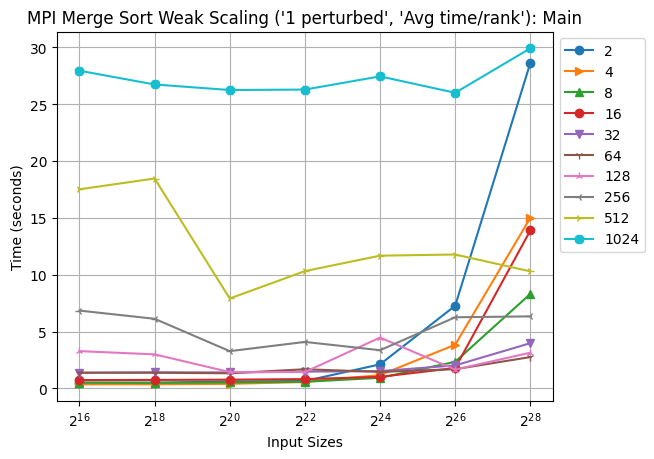

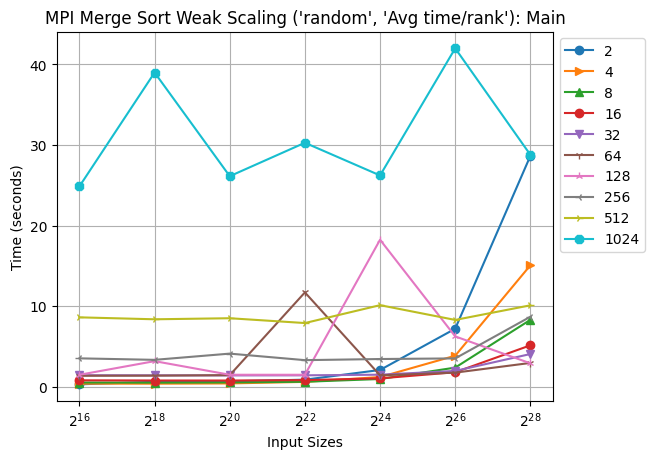

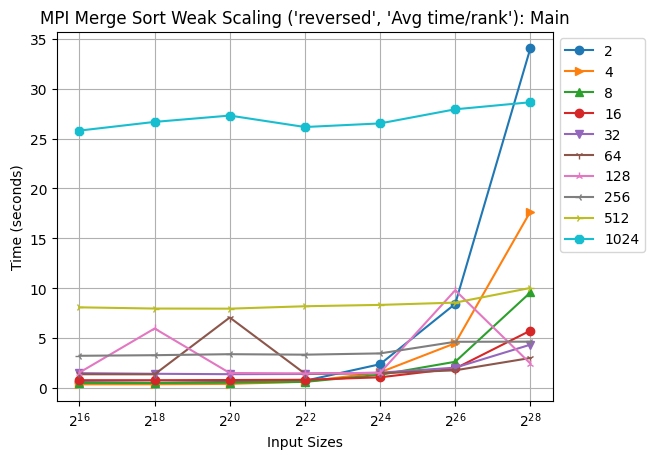

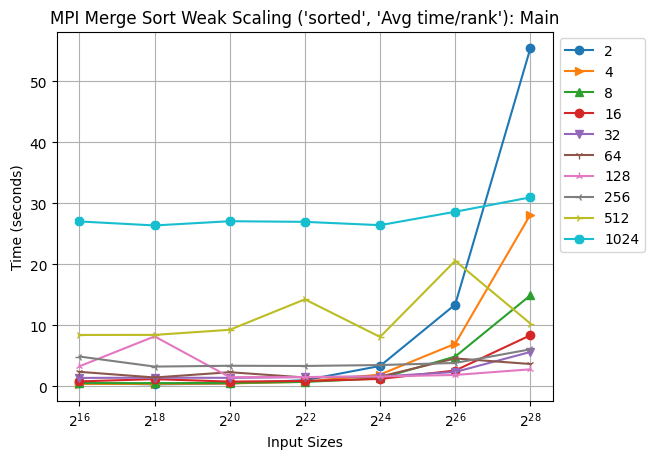

In [27]:
i = 0
for ctk in allctk:
    plot_mpl_numprocs(
        df=ctk.dataframe[[threads[0]]].loc["main"],
        df1= ctk.dataframe[[threads[1]]].loc["main"],
        df2= ctk.dataframe[[threads[2]]].loc["main"],
        df3= ctk.dataframe[[threads[3]]].loc["main"],
        df4= ctk.dataframe[[threads[4]]].loc["main"],
        df5= ctk.dataframe[[threads[5]]].loc["main"],
        df6= ctk.dataframe[[threads[6]]].loc["main"],
        df7= ctk.dataframe[[threads[7]]].loc["main"],
        df8= ctk.dataframe[[threads[8]]].loc["main"],
        df9= ctk.dataframe[[threads[9]]].loc["main"],
        title=f"MPI Merge Sort Weak Scaling {sorttypes[i]}: Main",
        xlabel="Input Sizes",
        ylabel="Time (seconds)",
        label1='2',
        label2='4',
        label3='8',
        label4= '16',
        label5= '32',
        label6= '64',
        label7= '128',
        label8= '256',
        label9= '512',
        label10= '1024'
    )
    i += 1

# Plot of 2

In [28]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["main"],
#         df1= ctk.dataframe[[temp[2]]].loc["main"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Main",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comp_Large Graphs (for 3 then 2)

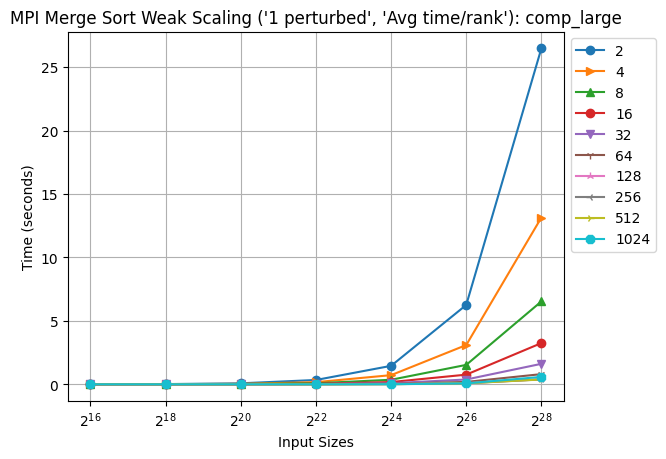

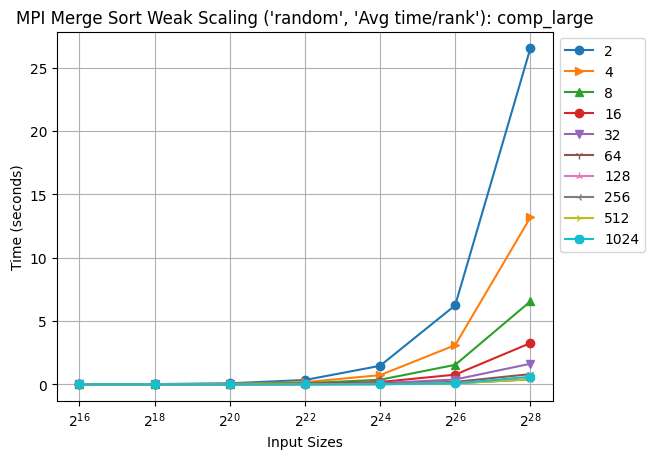

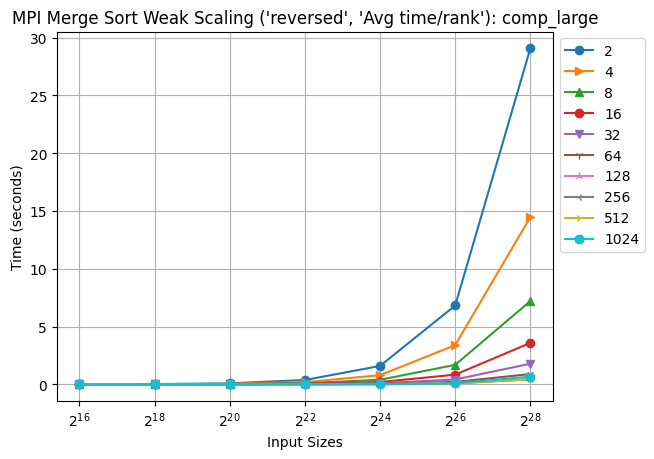

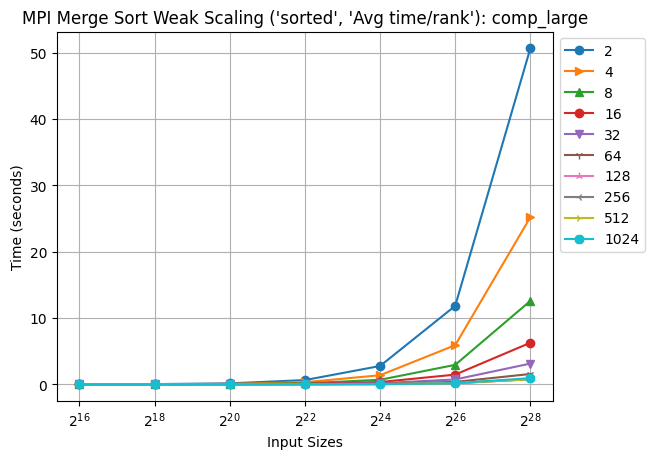

In [29]:
i = 0
for ctk in allctk:
    plot_mpl_numprocs(
        df=ctk.dataframe[[threads[0]]].loc["comp_large"],
        df1= ctk.dataframe[[threads[1]]].loc["comp_large"],
        df2= ctk.dataframe[[threads[2]]].loc["comp_large"],
        df3= ctk.dataframe[[threads[3]]].loc["comp_large"],
        df4= ctk.dataframe[[threads[4]]].loc["comp_large"],
        df5= ctk.dataframe[[threads[5]]].loc["comp_large"],
        df6= ctk.dataframe[[threads[6]]].loc["comp_large"],
        df7= ctk.dataframe[[threads[7]]].loc["comp_large"],
        df8= ctk.dataframe[[threads[8]]].loc["comp_large"],
        df9= ctk.dataframe[[threads[9]]].loc["comp_large"],
        title=f"MPI Merge Sort Weak Scaling {sorttypes[i]}: comp_large",
        xlabel="Input Sizes",
        ylabel="Time (seconds)",
        label1='2',
        label2='4',
        label3='8',
        label4= '16',
        label5= '32',
        label6= '64',
        label7= '128',
        label8= '256',
        label9= '512',
        label10= '1024'
    )
    i += 1

In [30]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["comp_large"],
#         df1= ctk.dataframe[[temp[2]]].loc["comp_large"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Comp Large",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comm Graphs (for 3 then 2)

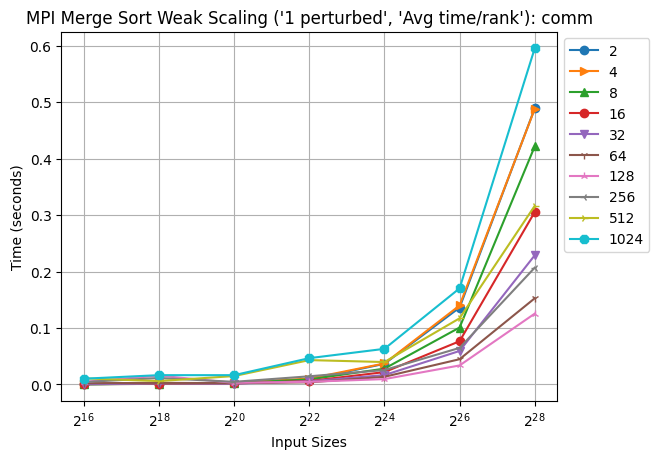

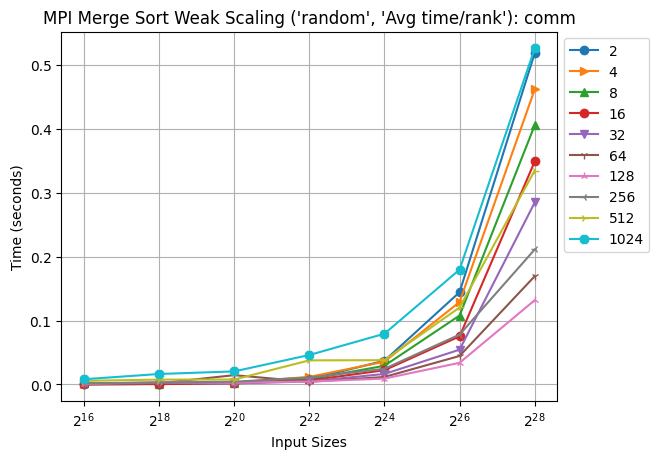

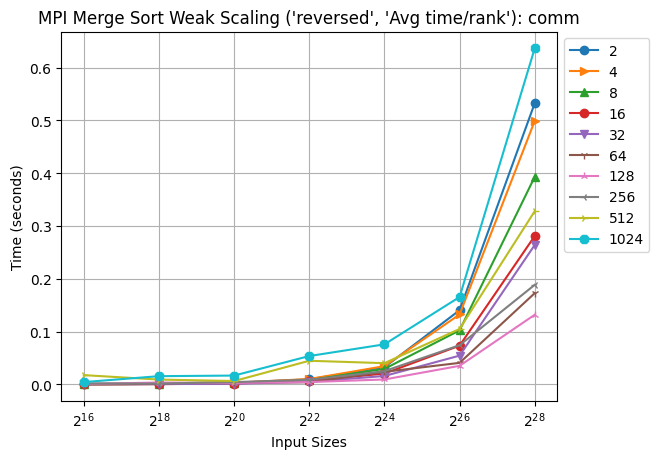

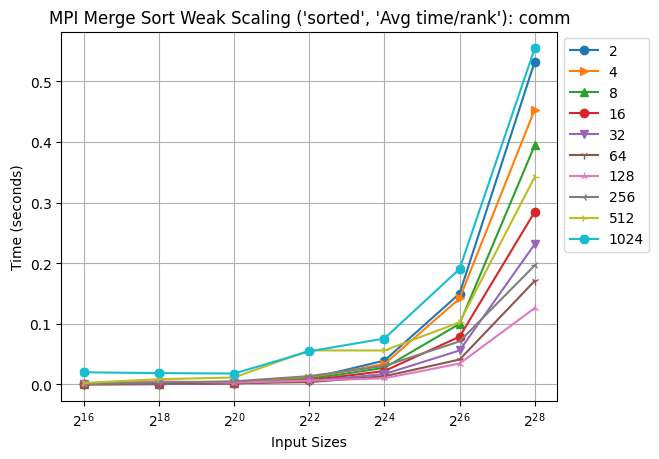

In [31]:
i = 0
for ctk in allctk:
    plot_mpl_numprocs(
        df=ctk.dataframe[[threads[0]]].loc["comm"],
        df1= ctk.dataframe[[threads[1]]].loc["comm"],
        df2= ctk.dataframe[[threads[2]]].loc["comm"],
        df3= ctk.dataframe[[threads[3]]].loc["comm"],
        df4= ctk.dataframe[[threads[4]]].loc["comm"],
        df5= ctk.dataframe[[threads[5]]].loc["comm"],
        df6= ctk.dataframe[[threads[6]]].loc["comm"],
        df7= ctk.dataframe[[threads[7]]].loc["comm"],
        df8= ctk.dataframe[[threads[8]]].loc["comm"],
        df9= ctk.dataframe[[threads[9]]].loc["comm"],
        title=f"MPI Merge Sort Weak Scaling {sorttypes[i]}: comm",
        xlabel="Input Sizes",
        ylabel="Time (seconds)",
        label1='2',
        label2='4',
        label3='8',
        label4= '16',
        label5= '32',
        label6= '64',
        label7= '128',
        label8= '256',
        label9= '512',
        label10= '1024'
    )
    i += 1